No handles with labels found to put in legend.


date price
2019-08-31 10:53:11 4300
2019-08-31 10:53:11
2019-08-29 21:46:49 70006000
2019-08-29 21:46:49
2019-08-27 00:53:45 
2019-08-19 23:57:01 
2019-08-15 02:29:12 9500
2019-08-15 02:29:12
2019-08-12 17:56:44 
2019-07-31 19:25:23 7000
2019-07-31 19:25:23
2019-07-08 21:51:57 9500
2019-07-08 21:51:57
2019-07-02 00:19:11 10000
2019-07-02 00:19:11
2019-06-25 14:13:49 800011000
2019-06-25 14:13:49
2019-06-24 15:16:50 10000
2019-06-24 15:16:50
2019-06-15 23:30:03 none
2019-05-13 22:19:30 7000
2019-05-13 22:19:30
2019-05-11 11:27:23 11000
2019-05-11 11:27:23
2019-05-05 23:21:14 
2019-03-31 06:28:58 10000
2019-03-31 06:28:58
2019-03-23 18:27:31 9500
2019-03-23 18:27:31
2019-03-19 22:50:22 12800
2019-03-19 22:50:22
2019-03-08 21:39:11 8500
2019-03-08 21:39:11
2019-03-03 21:48:56 12800
2019-03-03 21:48:56
2019-02-27 19:27:03 9000
2019-02-27 19:27:03
2019-02-25 21:27:40 8000
2019-02-25 21:27:40
2019-02-24 15:21:57 10000
2019-02-24 15:21:57
2019-02-09 10:10:45 19000
2019-02-09 10:10:45
2019-02-

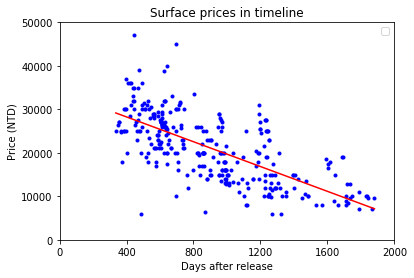

The formula of second hand price of surface pro 3 : 33957.0 + -14.26 * days


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import re
from datetime import datetime, date
release_datetime = datetime(year = 2014, month = 6, day = 20, hour = 10, minute = 0, second = 0)
x, y = [], []
with open('ptt_surface3.csv', 'r') as csvfile:
    r= csv.reader(csvfile, delimiter=',')
    for i,row in enumerate(r):
        print(row[6], row[5])
        if i > 0 and row[6] != '-1' and row[5].isdigit() :
            time_list = re.split(':| |-',row[6])
            if 2000 < int(time_list[0]) and 2020 > int(time_list[0]):
                post_datetime = datetime(year = int(time_list[0]), month = int(time_list[1]), day = int(time_list[2]), hour = int(time_list[3]), minute = int(time_list[4]), second = int(time_list[5]))
                print(post_datetime)
                if int(row[5])> 5000 and int(row[5]) < 50000:
                    delta = post_datetime-release_datetime
                    x.append(delta.days)
                    y.append(int(row[5]))
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,y,'b.',x,p(x),'r-')
#plt.plot(x,Y,'r-')
plt.title('Surface prices in timeline')
plt.xlabel('Days after release')
plt.ylabel('Price (NTD)')
#plt.legend(loc='upper right')
plt.xticks(np.arange(0, 2400, 400))
plt.yticks(np.arange(0, 60000, 10000))  
plt.show()

print('The formula of second hand price of surface pro 3 : %s + %s * days'% (round(z[1]) ,round(z[0],2)))